# Exam/Project Advanced Financial Modelling

In [36]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## *Briefing*

In the context of investing, "bear expectations" refer to a market outlook where investors anticipate a decline in the value of an asset, index, or the market as a whole. In this case, the Direxion Daily S&P 500® Bear (SPXS) 3X Shares ETF is recommended for investors who expect the S&P 500 index to decline, or when there is a bearish outlook on the market.

*  The **SPXS is an inverse leveraged ETF** that provides 3 times leveraged short exposure to the S&P 500. This means that when the S&P 500 index declines in value, the **ETF is designed to increase in value at 3 times the rate of the decline**. Conversely, if the S&P 500 index increases in value, the ETF will lose value at 3 times the rate of the increase. For example, if the S&P 500 index declines by 1% in a single day, the SPXS ETF is expected to increase by approximately 3% on the same day. Similarly, if the S&P 500 index increases by 1%, the SPXS ETF would decrease by approximately 3%.

Similarly, "bull expectations" refer to a market outlook where investors anticipate an increase in the value of an asset, index, or the market as a whole.

*      SPDR S&P 500 ETF (SPY): This ETF, also known as "spider," is one of the most popular and widely-traded ETFs in the world. It is designed to track the performance of the S&P 500 index, providing investors with delta 1 exposure. Delta 1 exposure means that the ETF is expected to move in the same direction and with the same magnitude as the underlying index. SPY offers a cost-effective way to gain diversified exposure to the U.S. large-cap equity market since it holds the same stocks as the S&P 500 index in the same proportions.

*  Direxion Daily S&P 500® Bull (SPXL) 3X Shares: This ETF is a leveraged ETF that aims to provide 3 times the daily return of the S&P 500 index. When the S&P 500 index increases in value, the SPXL ETF is designed to increase in value at 3 times the rate of the increase. Conversely, if the S&P 500 index declines in value, the SPXL ETF will lose value at 3 times the rate of the decline.

We also add ProShares S&P 500 Ex-Financials ETF (SPXN) which is an exchange-traded fund (ETF) that aims to provide investors with exposure to the S&P 500 index, excluding financial sector stocks. This ETF is designed for investors who want to invest in the S&P 500 index but prefer to avoid exposure to the financial sector, which may include banks, insurance companies, and other financial services firms.

## Descriptive data analysis

In [37]:
tickers = ['SPXS', 'SPY', 'SPXL', 'SPXN']

# Download data from Yahoo Finance API
data = yf.download(tickers, start='2017-01-01')['Close']

# Compute daily log-returns
log_returns = data.apply(lambda x: np.log(x) - np.log(x.shift(1))).dropna()

#Compute daily returns
daily_returns = data.pct_change().dropna()

# Normalize by initial value
normalized_data = data / data.iloc[0]



[*********************100%***********************]  4 of 4 completed


In [38]:
daily_returns

,SPXL,SPXN,SPXS,SPY
Date,,,,
2017-01-04,0.017722,0.000000,-0.016114,0.005949
2017-01-05,-0.002322,0.000000,0.000963,-0.000794
2017-01-06,0.011278,0.000000,-0.010587,0.003578
2017-01-09,-0.009471,0.000000,0.008755,-0.003301
2017-01-10,-0.000894,0.000000,0.002893,0.000000
...,...,...,...,...
2023-03-30,0.016206,0.007167,-0.017544,0.005855
2023-03-31,0.042005,0.014347,-0.041667,0.014095
2023-04-03,0.010522,0.004673,-0.009599,0.003811


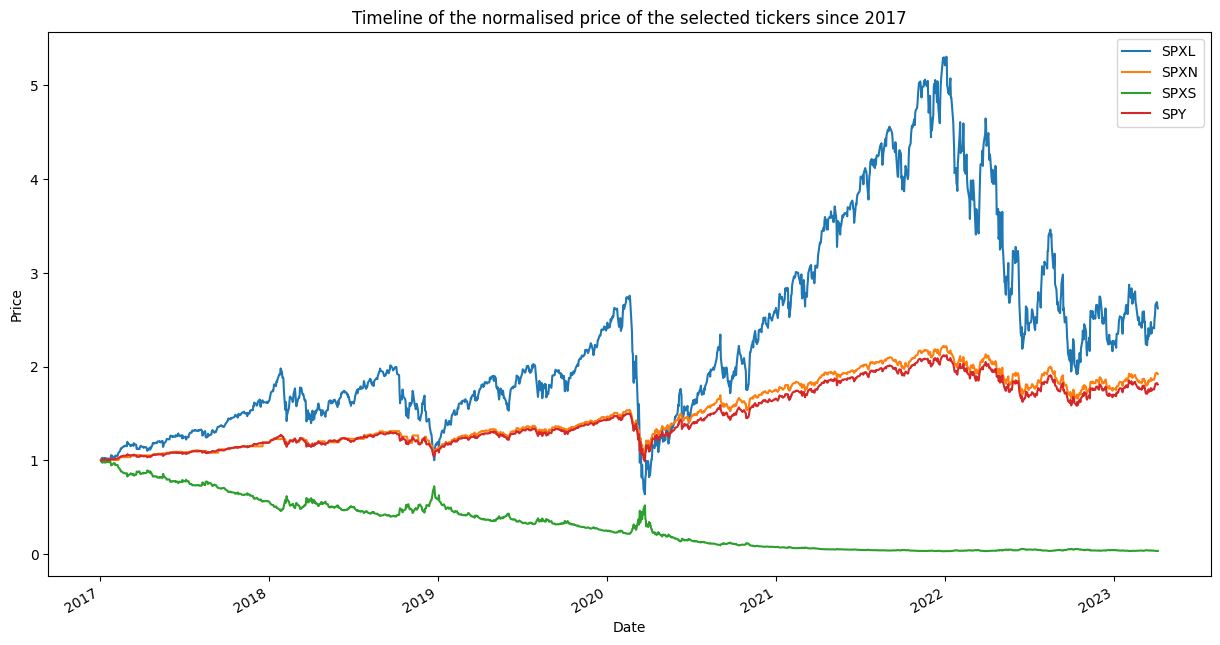

In [39]:
# Plot daily close price
normalized_data.plot(figsize=(15, 8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Timeline of the normalised price of the selected tickers since 2017")
plt.legend(['SPXL','SPXN', 'SPXS', 'SPY'])
plt.show()

We see that SPXL has more times were it increases its value. And it apparently seems that there is a 3X (approximately) magnification when the prices of SPY go up. 

On the other hand SPXS has the opposite behaviour, dominated by the downward movements with a couple of spikes at critical moments of the market.

It is worth to notice also that the SPXN outperforms SPY after the COVID crisis, which could be related to a great relative growth of the Biotechnology sector in comparison with the Finance sector.   

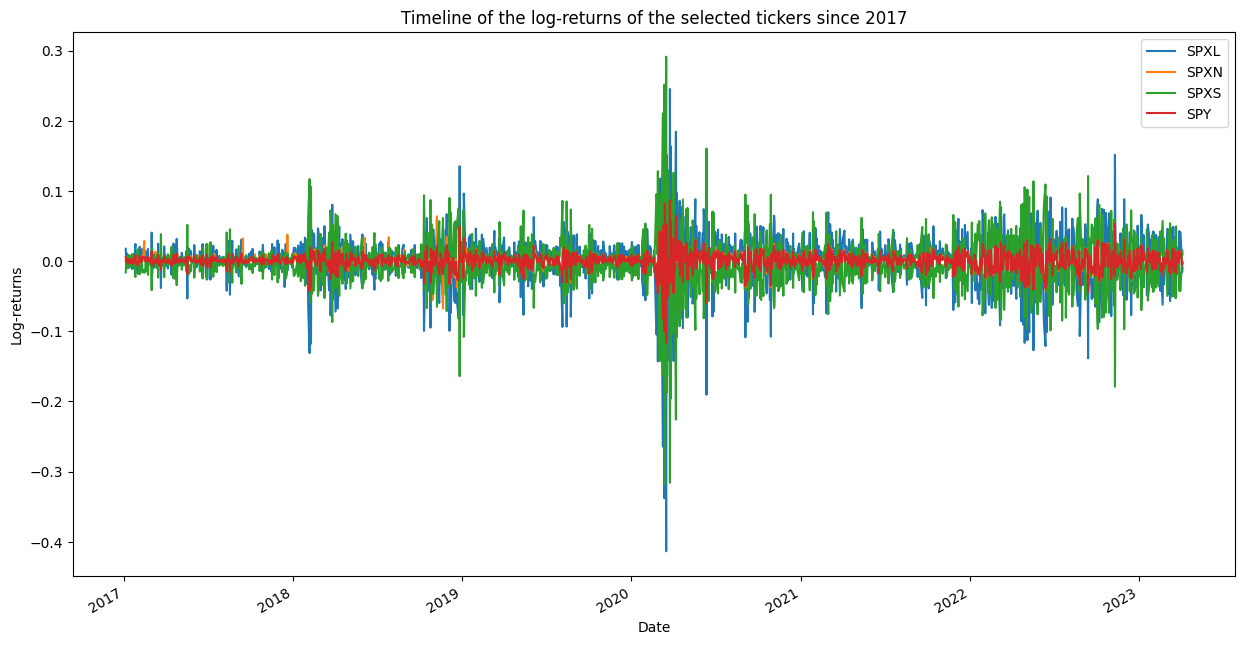

In [40]:
# Plot daily log-returns
log_returns.plot(figsize=(15, 8))
plt.xlabel('Date')
plt.ylabel('Log-returns')
plt.title("Timeline of the log-returns of the selected tickers since 2017")
plt.legend(['SPXL','SPXN', 'SPXS', 'SPY'])
plt.show()


Here we see how the leveraged funds are much more volatile than the SPY. As expected they magnify both wins and losses and look to be oppositely correlated.

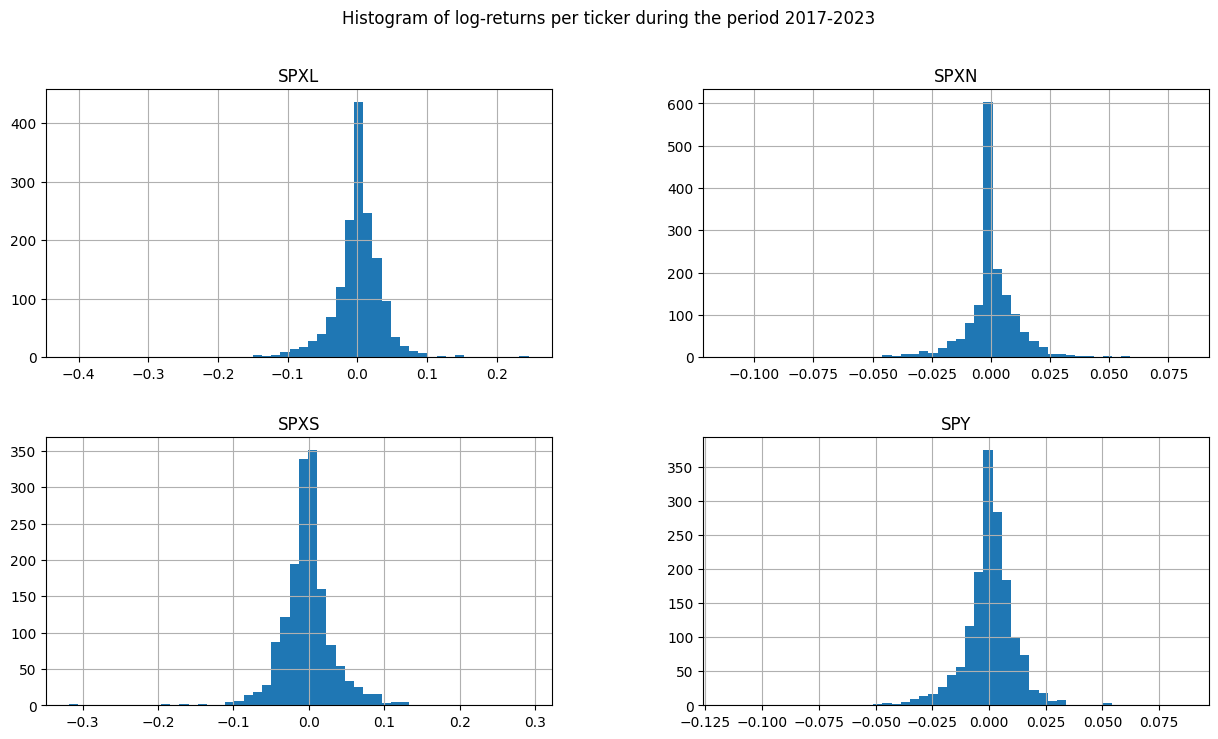

In [41]:
# Plot histograms of daily log-returns
log_returns.hist(bins=50, figsize=(15, 8))
plt.suptitle("Histogram of log-returns per ticker during the period 2017-2023")
#plt.legend(['SPXL','SPXN', 'SPXS', 'SPY'])
plt.show()

This plot shows the distribution of daily log-returns for each of the four ETFs. The x-axis shows the log-returns, and the y-axis shows the frequency of occurrence for each bin. 

We can see that the bear ETF (SPXS) has a more symmetric distribution than the other three ETFs. A good question could be why?  Well a possible explanation could be that market downturns and corrections are generally more abrupt and severe than market upswings, which often exhibit a more gradual and steady climb. This could lead to a more symmetric distribution of log-returns for SPXS and contribute to an aparition of more extreme negative cases in SPXL. Which is confirmed by the plots. 

We could also notice that SPY and SPXN are the less volatile, and that between these SPXN looks slightly less so.

**Let's confirm this insights with the following statistics.**

In [42]:
# Compute annualized statistics
mean_return = log_returns.mean() * 252
volatility = log_returns.std() * np.sqrt(252)
skewness = log_returns.skew()
kurtosis = log_returns.kurtosis()

# Create a dictionary to store the statistics
stats_dict = {
    'Mean Return': mean_return,
    'Volatility': volatility,
    'Skewness': skewness,
    'Kurtosis': kurtosis
}

# Create a pandas DataFrame from the dictionary
stats_df = pd.DataFrame(stats_dict)

# Display the DataFrame
print(stats_df)

      Mean Return  Volatility  Skewness   Kurtosis
SPXL     0.154295    0.603669 -1.481850  18.191732
SPXN     0.104502    0.193805 -0.809495  12.389995
SPXS    -0.540877    0.593599 -0.296449  13.298813
SPY      0.094959    0.198900 -0.830423  13.073069


These are the annualized descriptive statistics for the daily log-returns of the three ETFs:

Mean returns: The mean return is a measure of the average return an investment generates over a given period. In this case, the bull ETF (SPXL) has the highest mean return, indicating that it has generated the highest average return over the period. However, it is important to note that the bear ETF (SPXS) has a negative mean return, indicating that it has, on average, lost value over the period. This is due to the fact that the bear ETF is designed to provide inverse returns to the S&P 500 index, which has generally increased in value over the period. The non-leveraged S&P 500 ETF (SPY) has a lower mean return than the SPXL, but a positive mean return nonetheless.

Volatility: Volatility is a measure of the amount of fluctuation an investment experiences over a given period. In this case, the bull and bear ETFs have similar levels of volatility, indicating that they are both highly volatile investments. The non-leveraged S&P 500 ETF (SPY) has much lower volatility than the leveraged ETFs, indicating that it is a less volatile investment. It is important to note that high volatility does not necessarily indicate higher risk, but it does indicate that the investment is likely to experience greater fluctuations in value over time. We confirm that SPXN has slightly less volatility.

Skewness: Skewness is a measure of the asymmetry of a distribution. In this case, all four ETFs have negative skewness, indicating that they have more extreme negative returns than extreme positive returns. The bull ETF (SPXL) has the most negative skewness, indicating that it has more extreme negative returns than the other two ETFs (as expected). This suggests that the SPXL may be a riskier investment than the other two ETFs, as it is more likely to experience extreme negative returns. Also the SPXS has the less skewness indicating that is the less vulnerable to extreme negative events.

Kurtosis: Kurtosis is a measure of the "peakedness" of a distribution. In this case, all four ETFs have positive kurtosis, indicating that they have more extreme returns (both positive and negative) than would be expected in a normal distribution. The SPXL has the highest kurtosis, indicating that it has the most extreme returns of the three ETFs. This suggests that the bull ETF may be a riskier investment than the other three ETFs, as it is more likely to experience extreme positive and negative returns.

Overall, these statistics suggest that the bull ETF (SPXL) is a high-risk, high-reward investment, while the non-leveraged S&P 500 ETF (SPY) is a lower-risk, lower-reward investment (similarly SPXN). The bear ETF (SPXS) is a high-risk investment that may be appropriate for investors with a bearish outlook on the market, but it is important to note that it has lost value on average over the period.

In [43]:
risk_free_rate = 0.01

# Compute annualized Sharpe ratios
sharpe_ratios = (mean_return - risk_free_rate) / volatility
print(sharpe_ratios)

SPXL    0.239031
SPXN    0.487612
SPXS   -0.928029
SPY     0.427147
dtype: float64


Sharpe ratios: the Sharpe ratio is a measure of risk-adjusted return, which takes into account the volatility of an investment. A higher Sharpe ratio indicates better risk-adjusted returns.

* SPXL (Direxion Daily S&P 500® Bull 3X Shares): With a Sharpe ratio of 0.239, 
this leveraged ETF has a relatively low risk-adjusted return. This is not surprising, as leveraged ETFs usually exhibit higher volatility due to their amplification of daily index movements. 

* SPXN (ProShares S&P 500 Ex-Financials ETF): This ETF has a Sharpe ratio of 0.487, indicating a moderate risk-adjusted return. As this ETF is designed to track the performance of the S&P 500 index excluding the financial sector, it may offer a more stable and diversified investment option compared to a leveraged ETF like SPXL.

* SPXS (Direxion Daily S&P 500® Bear 3X Shares): The Sharpe ratio for this inverse leveraged ETF is negative (-0.928), suggesting that the risk-adjusted return has been poor. This may be due to the ETF's strategy of providing short exposure to the S&P 500 index, which could lead to losses during periods of market growth. Additionally, the leveraged nature of the ETF can amplify losses during unfavorable market conditions.

* SPY (SPDR S&P 500 ETF): With a Sharpe ratio of 0.427, this ETF has a moderate risk-adjusted return. This ETF is designed to track the S&P 500 index and is often used as a benchmark for the overall U.S. large-cap equity market. Its Sharpe ratio suggests that it has provided a relatively stable return compared to the leveraged ETFs SPXL and SPXS.

 Non-leveraged ETFs, such as SPXN and SPY, tend to have more moderate risk-adjusted returns, while leveraged ETFs like SPXL and SPXS exhibit more extreme performance.

In [44]:
# Compute correlation matrix of daily returns
correlation_matrix = log_returns.corr()
correlation_matrix

,SPXL,SPXN,SPXS,SPY
SPXL,1.000000,0.882221,-0.987803,0.996741
SPXN,0.882221,1.000000,-0.879015,0.882402
SPXS,-0.987803,-0.879015,1.000000,-0.993321
SPY,0.996741,0.882402,-0.993321,1.000000


<Axes: >

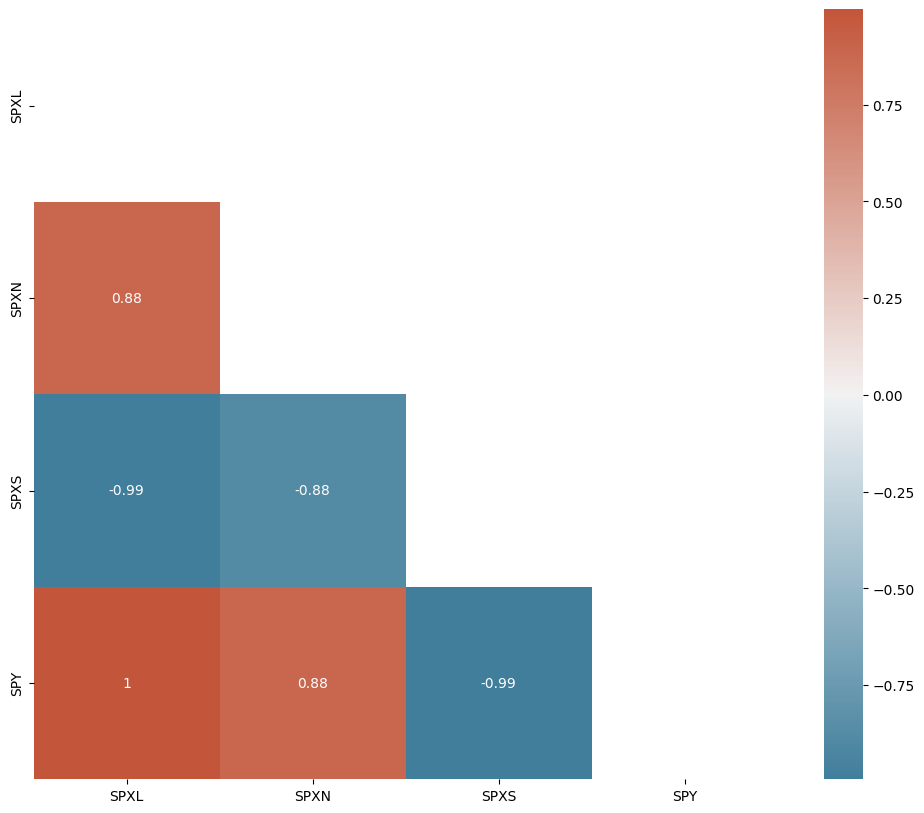

In [45]:
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, mask = mask, cmap=cmap)

The correlation matrix shows the pairwise correlations between the daily log-returns of the four ETFs. 

SPXL and SPXS: The correlation coefficient between the bull ETF (SPXL) and the bear ETF (SPXS) is -0.9878, indicating a very high negative correlation. This suggests that when the market is in a bearish phase and SPXS is increasing in value, SPXL is likely decreasing in value. This makes sense, as the two ETFs are designed to provide opposite exposure to the S&P 500 index.

SPXL and SPY: The correlation coefficient between the bull ETF (SPXL) and the non-leveraged S&P 500 ETF (SPY) is 0.9967, indicating a very high positive correlation. This suggests that the two ETFs tend to move in the same direction. This makes sense, as the bull ETF is designed to provide leveraged exposure to the S&P 500 index, and the non-leveraged ETF tracks the index.

SPXS and SPY: The correlation coefficient between the bear ETF (SPXS) and the non-leveraged S&P 500 ETF (SPY) is -0.9933, indicating a very high negative correlation. This suggests that when the market is in a bullish phase and SPY is increasing in value, SPXS is likely decreasing in value. This makes sense, as the bear ETF is designed to provide inverse exposure to the S&P 500 index.

Also, SPXN (ProShares S&P 500 Ex-Financials ETF) has positive covariance with both SPY and SPXL, indicating that these ETFs tend to move in the same direction. This is reasonable because all three ETFs provide exposure to the S&P 500 index (with SPXN excluding the financial sector). The negative covariance between SPXN and SPXS is expected since SPXS is designed to move in the opposite direction of the S&P 500 index

Overall, the correlation matrix suggests that an investor who holds both SPXL and SPY may not achieve significant diversification benefits, as the two ETFs tend to move in the same direction. Conversely, an investor who holds both SPXS and either SPXL or SPY may achieve some diversification benefits, as the two ETFs tend to move in opposite directions. It is important to note, however, that correlation is not the same as causation, and that past correlations may not necessarily hold in the future.

## Power profiles and Gamma effects

Since those ETFS maintain a constant leverage on the S&P 500, what has been
done in class might help to understand their return characteristics. Remember
that the value of a strategy with constant exposure `l` , shall be related by the
value of the underlying stock price, through the following relationship:

$$\frac{V_T}{V_0}=\left( \frac{S_T}{S_0}\right)^l \times \mathrm{exp}\left(-\frac{1}{2} \int_0^T(l^2-l) \sigma_s^2 ds\right)
$$

For both SPXL and SPXS, plot $V_T/V_0$ as a function of $SPY_T/SPY_0$ for rolling one year returns. Comment.

The previous equation can be understood as:
$$ 
y_i = lx_i+C_i(l, \sigma) 
$$
when we study the log-returns ($x$), and where $l$ is the exposure and $C_i$ a constant that depends on each day.   


First an explanation of what is a rolling one-year return: also known as a rolling 12-month return or rolling annual return, is a measure of an investment's performance over a moving one-year period. It calculates the return for each one-year window, shifting the window one day, week, or month at a time, depending on the desired frequency. This approach provides a comprehensive view of an investment's performance over time, as it captures the returns for all possible one-year periods within the specified range.

In [46]:
# Calculate rolling one-year returns for all tickers
rolling_returns = normalized_data.pct_change(256).dropna()
rolling_returns= rolling_returns +1

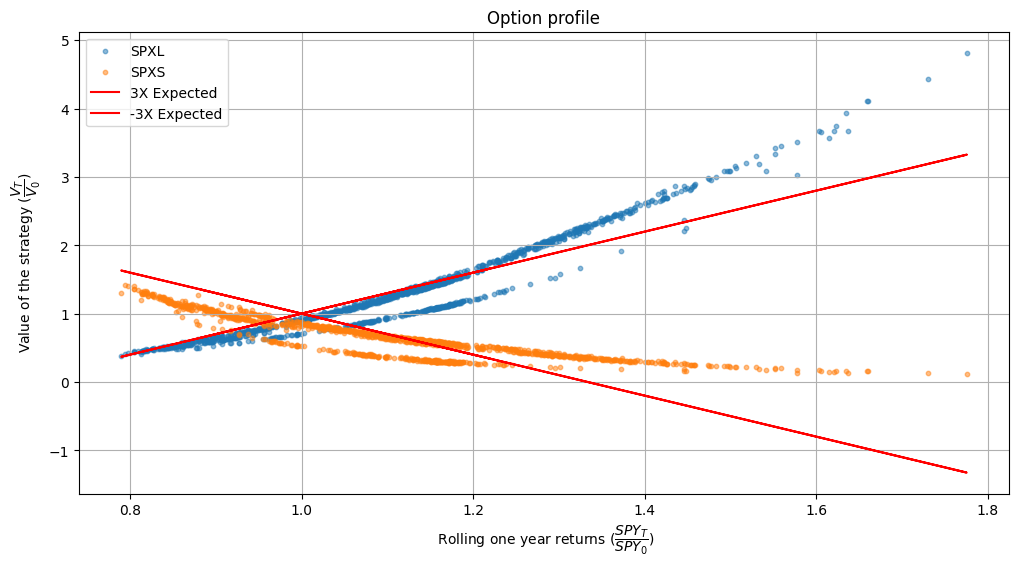

In [47]:
#Variables
x=rolling_returns["SPY"]

# Plot rolling one-year returns for SPXL and SPXS as a function of SPY
plt.figure(figsize=(12, 6))
plt.scatter(x, rolling_returns["SPXL"], label='SPXL', alpha=0.5, s=10)
plt.scatter(x, rolling_returns["SPXS"], label='SPXS', alpha=0.5, s=10)
#plt.scatter(rolling_returns["SPY"], rolling_returns["SPXN"], label='SPXN', alpha=0.5)

# Add lines with slope 3 and -3
plt.plot(x, 3 * x - 2, 'r-', label='3X Expected')
plt.plot(x, -3 * x + 4, 'r-', label='-3X Expected')
#plt.plot(rolling_returns["SPY"], rolling_returns["SPY"], 'r-', label='1X Expected')

plt.ylabel(r'Value of the strategy ($\dfrac{V_T}{V_0}$)')
plt.xlabel(r' Rolling one year returns ($\dfrac{SPY_T}{SPY_0}$)')
plt.legend()
plt.title('Option profile')
plt.grid(True)
plt.show()


In the previous picture we can see the relationship of the value of the underlying with the value of our product.

The SPXL ETF should ideally have a 3 times leveraged positive correlation with the SPY ETF (the blue dots should closely follow the "3X Expected" line), while the SPXS ETF should have a 3 times leveraged inverse correlation with the SPY ETF (the orange dots should closely follow the "-3X Expected" line). Or at least this is what a Main Street person would expect.

In the plot, what you observe are deviations from the expected lines, especially during periods of high volatility or extreme market movements. This can be attributed to the daily rebalancing and compounding effects of leveraged ETFs, which may cause their performance to deviate from their target leverage over longer periods.

It is worth to notice how puzzling is to find that when returns go way up the real value is way above the expected line (attributed to compounding effects). In the same fashion for the Bear ETS we shoudl expect to lose more than what we see. But also, we can check how in the neighborhood of 1, which should be the most common returns according to our previous histogram we do not even get the expected return.

*Do the same with taking into account the trading impact indicated by the
formula. Comment. Qualify the goodness of fit.*

To understand better the previous figure it may be good to have a look on the accumulated variance.

In [48]:
# Compute accumulated variance
N = 256  # number of trading days in a year
variances = log_returns.rolling(window=N).var()
accumulated_variances = variances.mul(N).dropna()

# Find accumulated variance for 09/01/2018
date = '2018-01-09'
print(accumulated_variances.loc[date])

SPXL    0.040656
SPXN    0.004859
SPXS    0.039562
SPY     0.004643
Name: 2018-01-09 00:00:00, dtype: float64


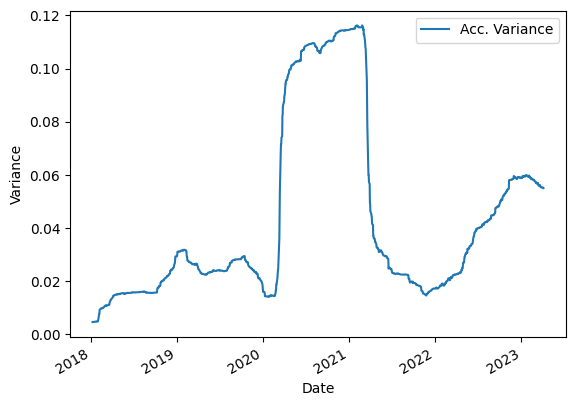

In [49]:
accumulated_variances['SPY'].plot(label="Acc. Variance")
plt.ylabel('Variance')
plt.legend()

High spike around COVID times indicating that maybe the points with less return may be a direct consequence. Also the variability of this plot explains why considering constant volatility should not be taken for granted.

In [50]:
#Definition of auxiliary functions for debugging purposes
def aux(l):
  return 0.5*(l**2-l)

def trading_effect(l):
  return np.exp(aux(l) * accumulated_variances["SPY"])

def value(x,l):
  return x * trading_effect(l)

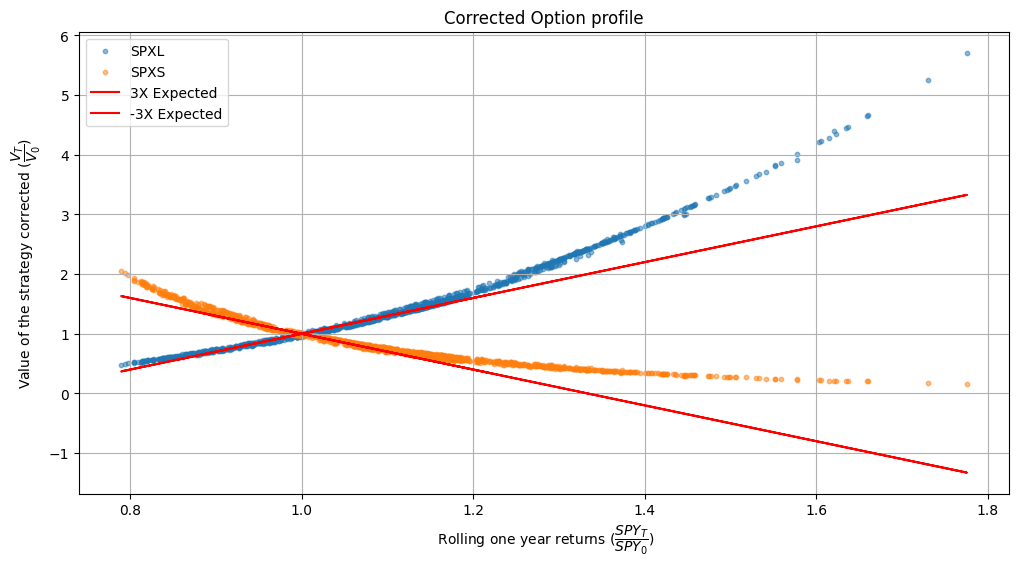

In [55]:
# Exposures
l1=3
l2=-3

#Variables
x=rolling_returns["SPY"]
y=value(rolling_returns["SPXL"],l1)
y2=value(rolling_returns["SPXS"],l2)

# Plot rolling one-year returns for SPXL and SPXS as a function of SPY
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='SPXL', alpha=0.5, s=10)
plt.scatter(x, y2, label='SPXS', alpha=0.5, s=10)

# Add lines with slope 3 and -3
plt.plot(rolling_returns["SPY"], 3 * rolling_returns["SPY"]-2, 'r-', label='3X Expected')
plt.plot(rolling_returns["SPY"], -3 * rolling_returns["SPY"]+4, 'r-', label='-3X Expected')

plt.ylabel(r'Value of the strategy corrected ($\dfrac{V_T}{V_0}$)')
plt.xlabel(r' Rolling one year returns ($\dfrac{SPY_T}{SPY_0}$)')
plt.legend()
plt.title('Corrected Option profile')
plt.grid(True)
plt.show()


After the correction we see that now every value lies above or in the expected line. This shows that for the most frequent returns we would get the promised 3X only if we consider the trading costs associated with our product/strtegy.

One property of the previous two plots is the convexity of the two lines of points. It could be interesting to check these effects on a daily return basis.

In [85]:
daily_variance = daily_returns.var()
print("Daily Variance:")
print(daily_variance)

def trading_effect(l):
  return np.exp(aux(l) * daily_variance["SPY"])

Daily Variance:
SPXL    0.001389
SPXN    0.000148
SPXS    0.001394
SPY     0.000156
dtype: float64


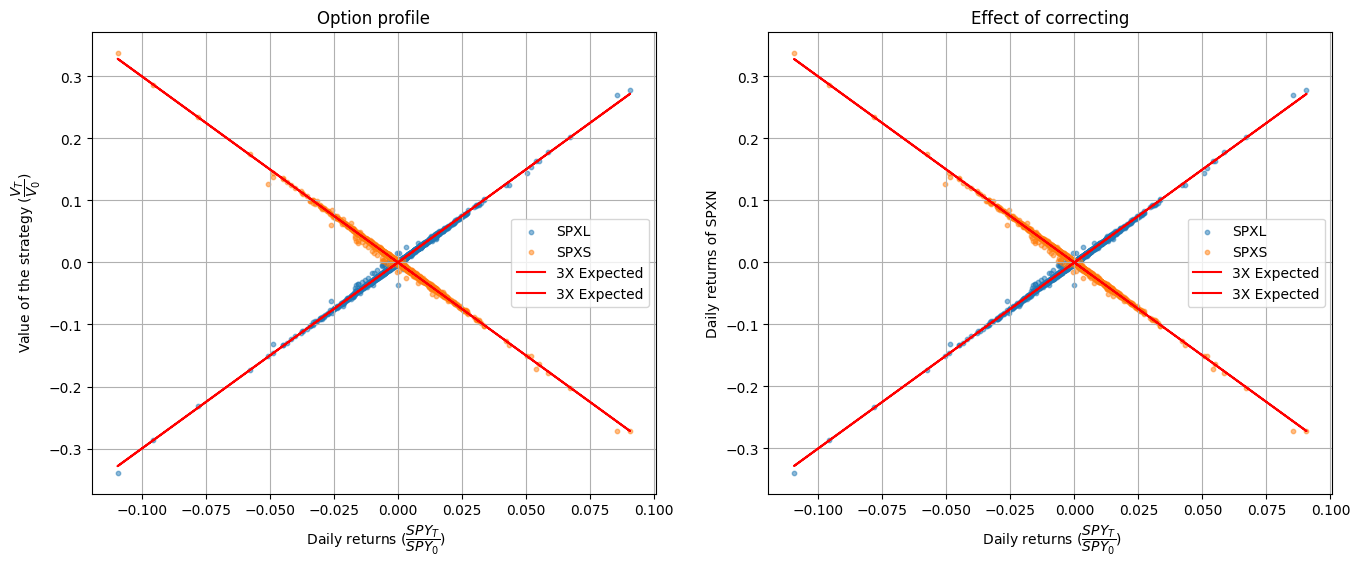

In [86]:
import matplotlib.pyplot as plt

# Assuming you have rolling_returns and daily_returns calculated
x = daily_returns["SPY"]
y=value(daily_returns["SPXL"],l1)
y2=value(daily_returns["SPXS"],l2)

# Create a 1x2 subplot grid and set the figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(x, daily_returns["SPXL"], label='SPXL', alpha=0.5, s=10)
axes[0].scatter(x, daily_returns["SPXS"], label='SPXS', alpha=0.5, s=10)
axes[0].plot(x, 3*daily_returns["SPY"], 'r-', label='3X Expected')
axes[0].plot(x, -3*daily_returns["SPY"], 'r-', label='3X Expected')
axes[0].set_ylabel(r'Value of the strategy ($\dfrac{V_T}{V_0}$)')
axes[0].set_xlabel(r' Daily returns ($\dfrac{SPY_T}{SPY_0}$)')
axes[0].legend()
axes[0].grid(True)
axes[0].set_title("Option profile")

axes[1].scatter(x, y, label='SPXL', alpha=0.5, s=10)
axes[1].scatter(x, y2, label='SPXS', alpha=0.5, s=10)
axes[1].plot(x, 3*daily_returns["SPY"], 'r-', label='3X Expected')
axes[1].plot(x, -3*daily_returns["SPY"], 'r-', label='3X Expected')
axes[1].set_ylabel(r'Daily returns of SPXN')
axes[1].set_xlabel(r' Daily returns ($\dfrac{SPY_T}{SPY_0}$)')
axes[1].legend()
axes[1].grid(True)

# Display the plots
plt.title("Effect of correcting")
plt.show()


We can see that our convex line has dissapeared. Besides, the effect of the volatility has been reduced too. This effect could make sense due to the fact that the daily movements/ changes could be small enough to offset a volatility spike.

Furthermore we perform a volatility correction again to see the results. The difference is really small. But it may be a consequence of a defective way of performing the variance calculation.

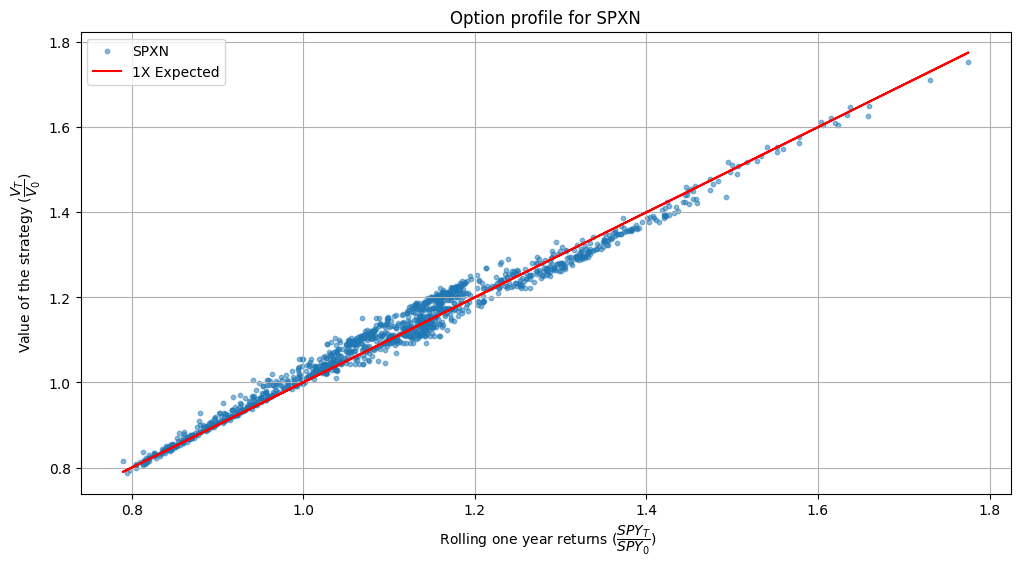

In [63]:
# Plot rolling one-year returns for SPXL and SPXS as a function of SPY
plt.figure(figsize=(12, 6))
plt.scatter(rolling_returns["SPY"], rolling_returns["SPXN"], label='SPXN', alpha=0.5, s=10)

# Add lines with slope 3 and -3
plt.plot(rolling_returns["SPY"], rolling_returns["SPY"], 'r-', label='1X Expected')

plt.ylabel(r'Value of the strategy ($\dfrac{V_T}{V_0}$)')
plt.xlabel(r' Rolling one year returns ($\dfrac{SPY_T}{SPY_0}$)')
plt.legend()
plt.title('Option profile for SPXN')
plt.grid(True)
plt.show()

For SPXN we see that it works well for usual returns (between 0.8-1.2) but from there onwards it starts to give less value than expected.

What does this analysis entail for investors ? Would you recommend these
products ?

The analysis so far has provided us with two main conclussions:
*  The products that we are dealing with are highly volatile, and with not positive enough Sharpe ratio. Moreover, the first graph shows that they are not meant to be held for a long time strategy, because they work well for some situations but can lose all its gains in a matter of days.
* The second part shows that the obtained returns are not what we expect. Hinting a lack of intuitive understanding for the common population of how this products work.

After the analysis we conclude that this products could work on some situations only. Moreover, they should be targeted to an educated population that both understand the inherent risks of the product but also who are not risk-averse.

## The product provider FAQ

 *Do they reflect appropriately the nature of the product for the layman
investor ?*

Well they start by saying:

"Perhaps, if you are a sophisticated and aggressive investor"

So it is a good postion to start clarifying their product. Furthermore, they also explain some of our findings:
*  If the target index is up 10% for a month, shouldn't I expect to have a 30% gain in my Direxion Bull 3X ETF? No, not typically.

* Are Direxion Shares ETFs appropriate for buy and hold investing? No, this is not recommended.


Also worth to notice that "Direxion Daily ETFs seek daily investment results." then, the yearly analysis maybe not their reference in mind when analysing their results.

They also provide some final market examples that they consider could be interesting.


---


In summary they provide most of the information covered in this report in their three points that they consider an investor should have in mind when buying these products:
* The willingness to accept substantial losses in short periods of time
* An understanding of the unique nature and performance characteristics of funds which seek leveraged daily investment results
* The time and attention to manage your positions frequently to respond to changing market conditions and fund performance.

*Would you suggest any modification ?*




The only thing that I consider is missing in this FAQ is some graphic example or quick link to more graphical information like the histograms or the normalised prices. But as it is a FAQ page thi is not the usual *modus operandi*. Regardless of this fact, providing clear performance statistics in this page could more insightful that give a link to other related pages.